In [1]:
import os
import sys

# 確保能匯入 src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.load_data import load_data
from src.clean_data import clean_data

df_raw = load_data()
df_clean = clean_data(df_raw)

Dataset URL: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset


In [2]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [3]:
df_clean.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


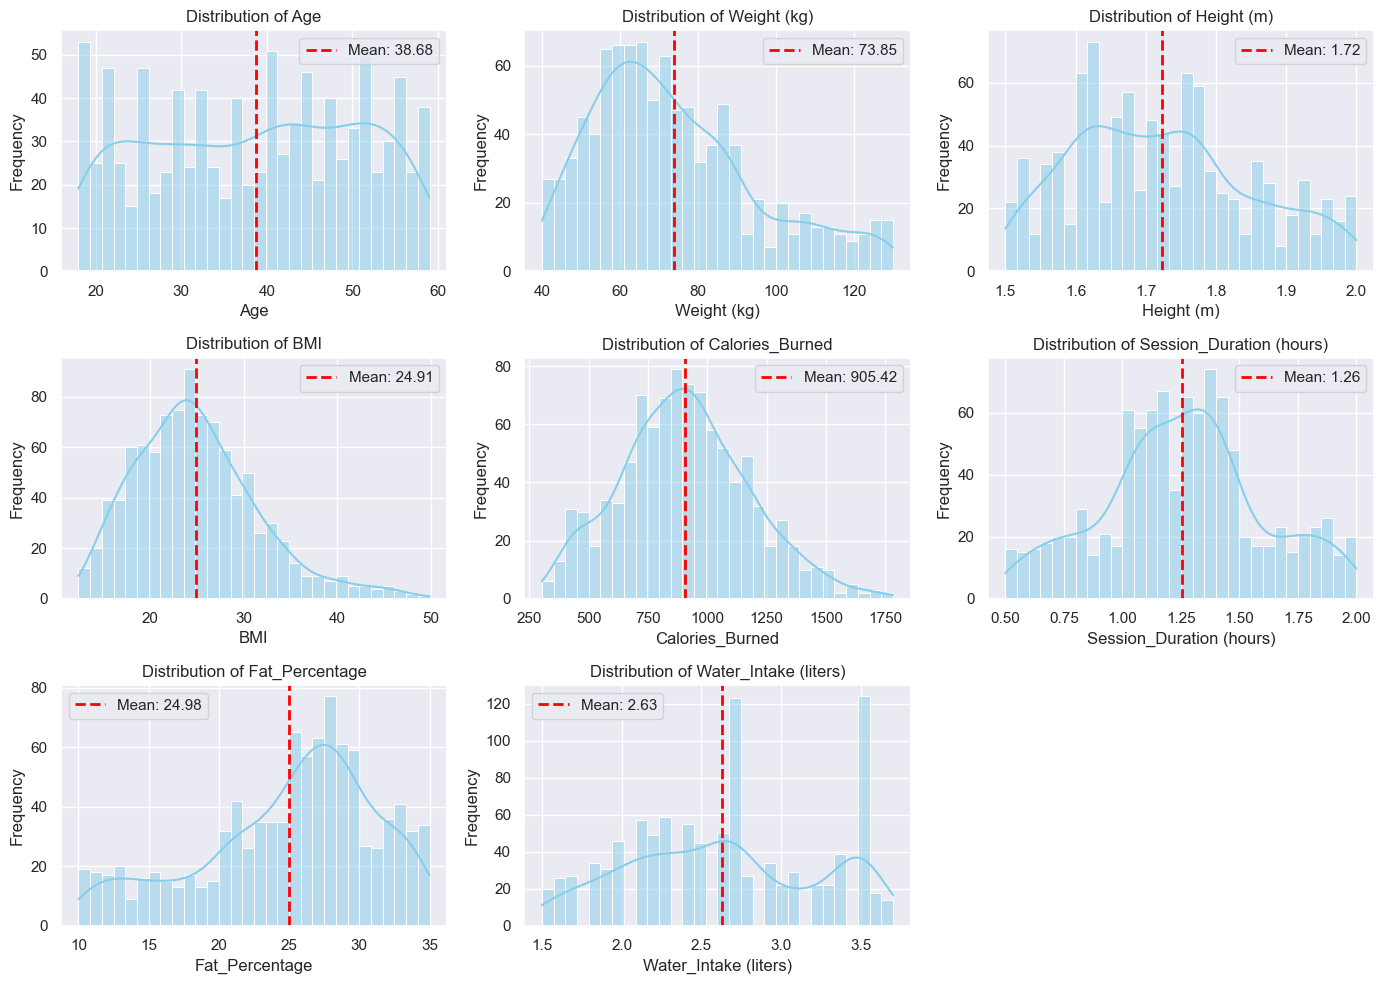

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="muted")
plt.figure(figsize=(14, 10))

num_features = [
    "Age", "Weight (kg)", "Height (m)",
    "BMI","Fat_Percentage",
    'Avg_BPM',"Session_Duration (hours)", "Calories_Burned", 
    "Workout_Frequency (days/week)",'Experience_Level'
]

# 平均值線顏色
mean_color = "red"

# enumerate() 會同時取出「索引」和「內容」
for i, feature in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    data = df_clean[feature]
    
    # 直方圖 + KDE核密度
    sns.histplot(data, kde=True, bins=30, color="skyblue")
    
    # 平均值線
    mean_val = data.mean()
    plt.axvline(mean_val, color=mean_color, linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()

/var/folders/5w/kbt5q6f538b2b17zcdhwsbp40000gn/T/ipykernel_28996/180851744.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=feature, palette="Set2")
/var/folders/5w/kbt5q6f538b2b17zcdhwsbp40000gn/T/ipykernel_28996/180851744.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=feature, palette="Set2")


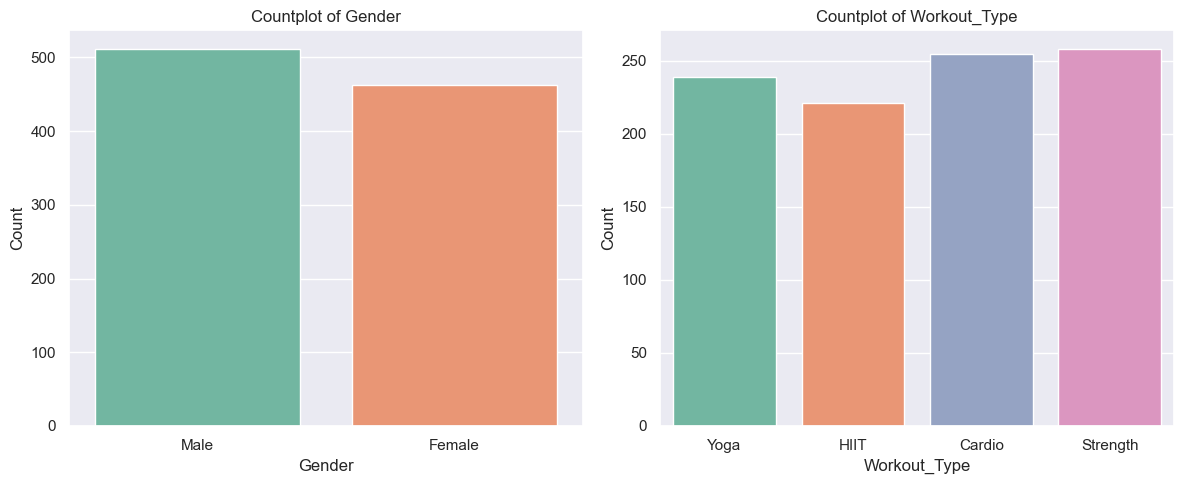

In [ ]:
categorical_features = ["Gender", "Workout_Type"]
plt.figure(figsize=(12, 5))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    
    # 第 2 張圖要加 hue（男女不同顏色）
    if feature == "Workout_Type":
        sns.countplot(data=df_clean, x=feature, hue="Gender", palette="Set2")
    else:
        sns.countplot(data=df_clean, x=feature, palette="Set2")

    plt.title(f"Countplot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

Low correlations:
 Calories_Burned                Session_Duration (hours)    0.908140
Session_Duration (hours)       Calories_Burned             0.908140
BMI                            Weight (kg)                 0.853158
Weight (kg)                    BMI                         0.853158
Workout_Frequency (days/week)  Experience_Level            0.837079
                                                             ...   
Fat_Percentage                 Water_Intake (liters)      -0.588683
                               Calories_Burned            -0.597615
Calories_Burned                Fat_Percentage             -0.597615
Fat_Percentage                 Experience_Level           -0.654363
Experience_Level               Fat_Percentage             -0.654363
Length: 156, dtype: float64


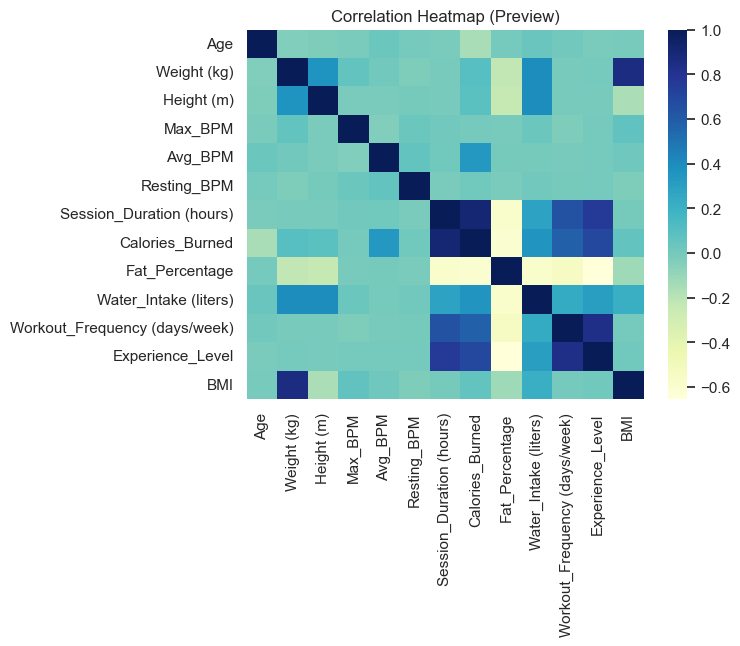

In [6]:
corr = df_clean.corr(numeric_only=True).unstack().sort_values(ascending=False)
#top_corr = corr[(corr < 1) & (corr > 0.6)].head(5)
#low_corr = corr[corr < 0.6].head(5)
low_corr = corr[corr < 1]
#print("Top correlations:\n", top_corr)
print("Low correlations:\n", low_corr)

sns.heatmap(df_clean.corr(numeric_only=True), cmap="YlGnBu", annot=False)
plt.title("Correlation Heatmap (Preview)")
plt.show()


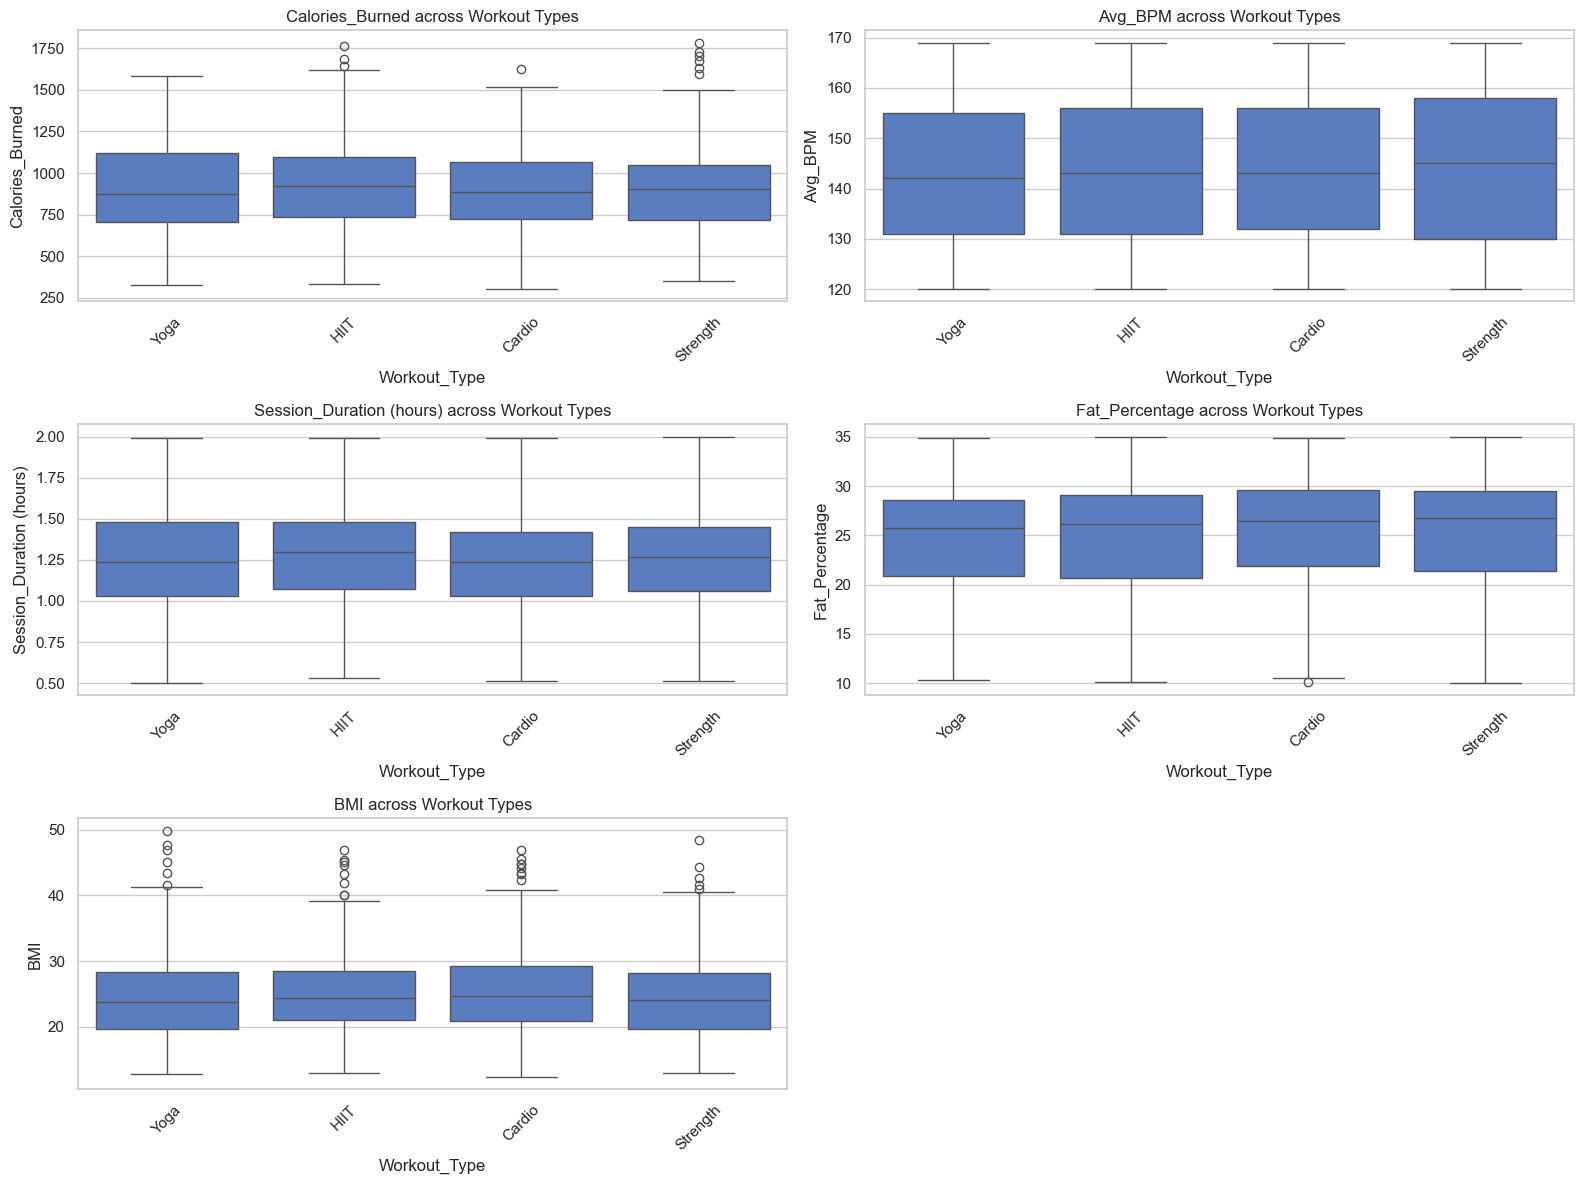

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

variables = ["Calories_Burned", "Avg_BPM", "Session_Duration (hours)", "Fat_Percentage", "BMI"]

plt.figure(figsize=(16, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x="Workout_Type", y=var, data=df_clean)
    plt.title(f"{var} across Workout Types")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


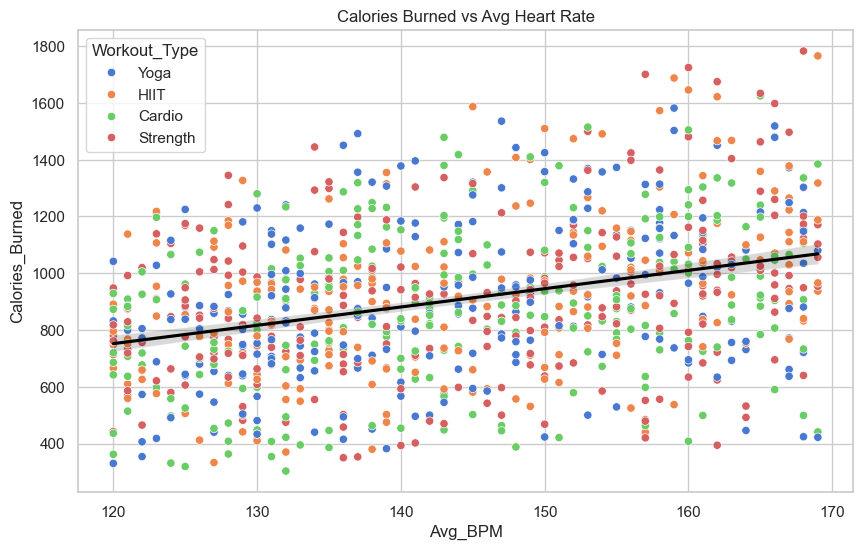

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Avg_BPM", y="Calories_Burned", hue="Workout_Type", data=df_clean)
sns.regplot(x="Avg_BPM", y="Calories_Burned", data=df_clean, scatter=False, color="black")
plt.title("Calories Burned vs Avg Heart Rate")
plt.show()


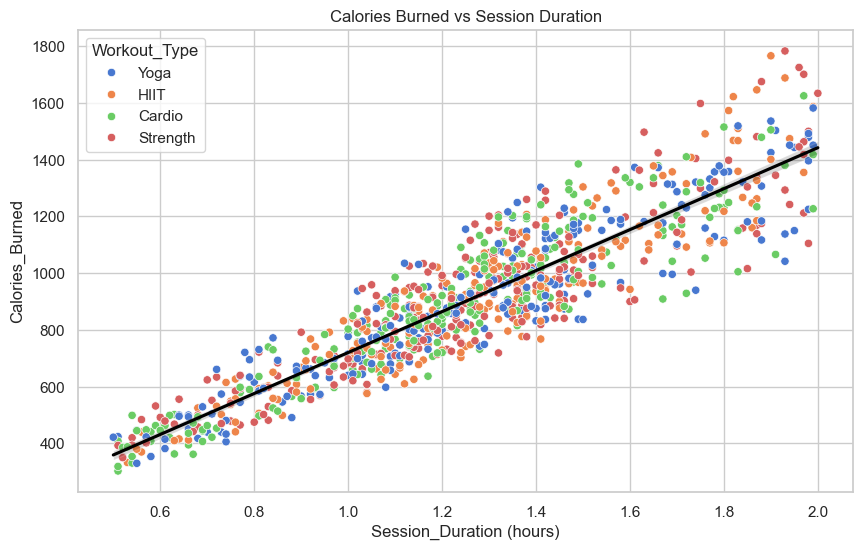

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Session_Duration (hours)", y="Calories_Burned", hue="Workout_Type", data=df_clean)
sns.regplot(x="Session_Duration (hours)", y="Calories_Burned", data=df_clean, scatter=False, color="black")
plt.title("Calories Burned vs Session Duration")
plt.show()


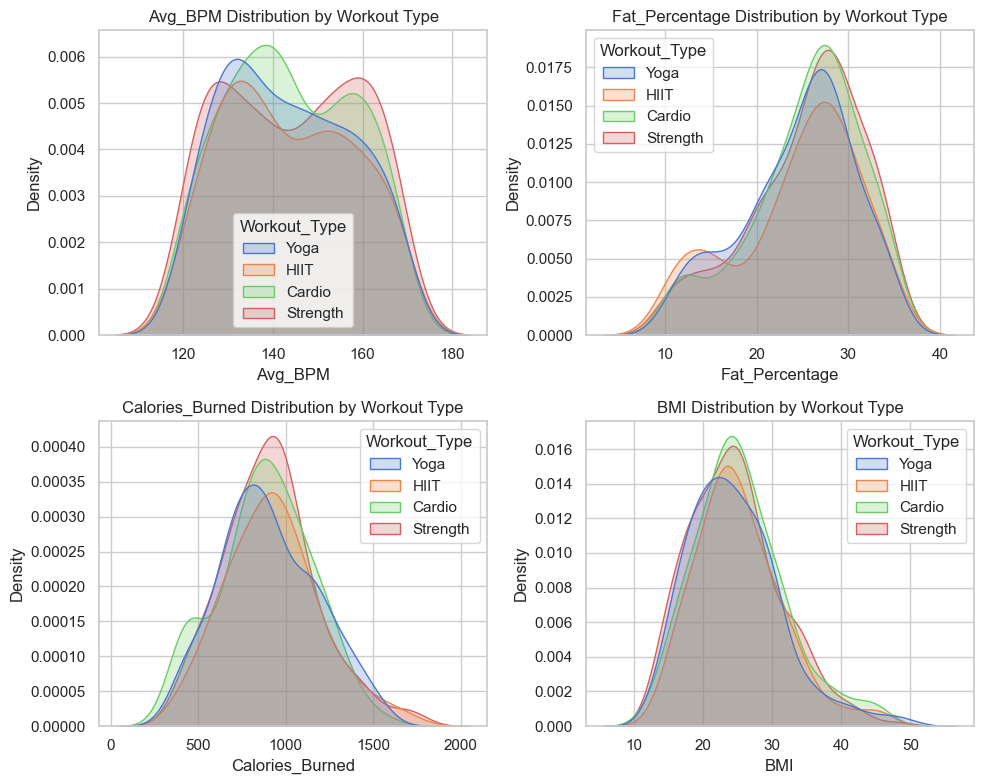

In [10]:
variables = ["Avg_BPM", "Fat_Percentage","Calories_Burned", "BMI"]
plt.figure(figsize=(10, 8))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df_clean, x=var, hue="Workout_Type", fill=True)
    plt.title(f"{var} Distribution by Workout Type")
plt.tight_layout()
plt.show()


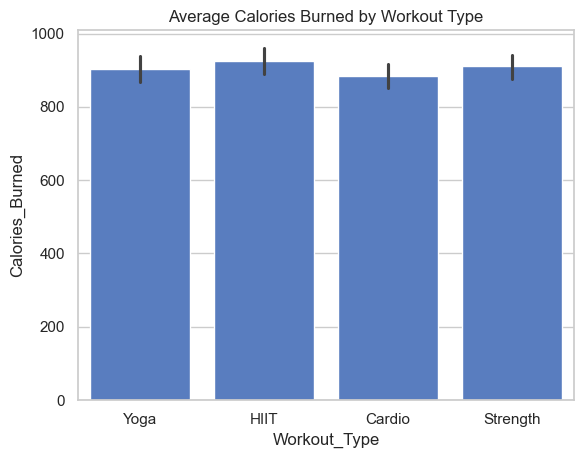

In [11]:
sns.barplot(data=df_clean, x='Workout_Type', y='Calories_Burned', estimator=lambda x: x.mean())
plt.title('Average Calories Burned by Workout Type')
plt.show()

In [12]:
# 衍生欄位
df_clean['Calories_per_hour'] = df_clean['Calories_Burned'] / df_clean['Session_Duration (hours)']
df_clean['Calories_per_heartbeat'] = df_clean['Calories_Burned'] / df_clean['Avg_BPM']

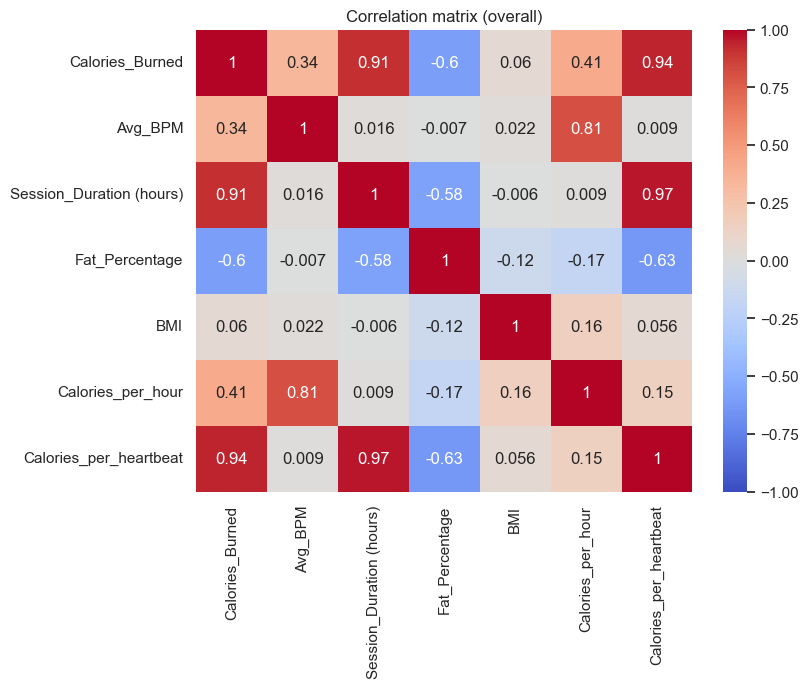

In [13]:
import seaborn as sns, matplotlib.pyplot as plt
cols = ['Calories_Burned','Avg_BPM','Session_Duration (hours)','Fat_Percentage','BMI','Calories_per_hour','Calories_per_heartbeat']
corr = df_clean[cols].corr().round(3)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix (overall)')
plt.show()  

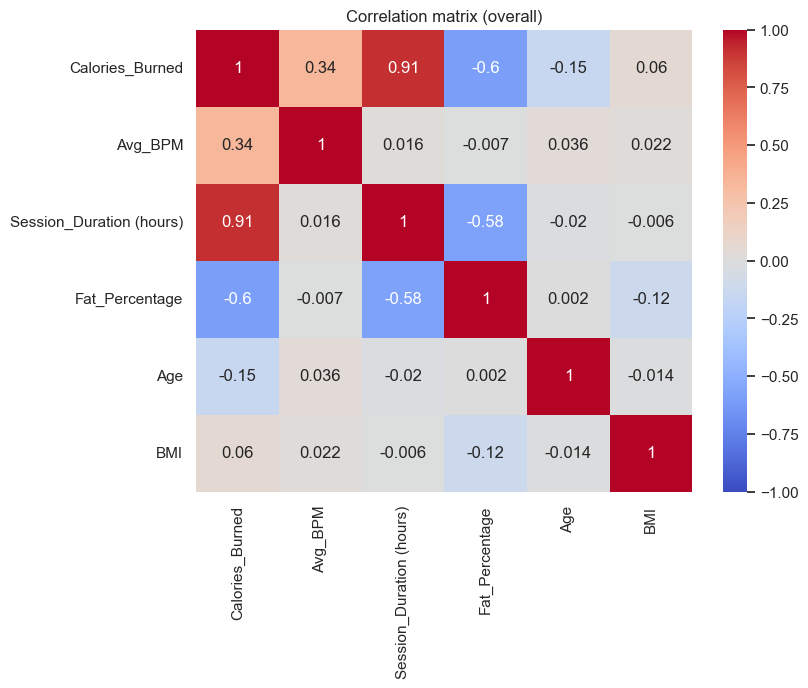

In [14]:
import seaborn as sns, matplotlib.pyplot as plt
cols = ['Calories_Burned','Avg_BPM','Session_Duration (hours)','Fat_Percentage',"Age",'BMI']
corr = df_clean[cols].corr().round(3)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix (overall)')
plt.show()

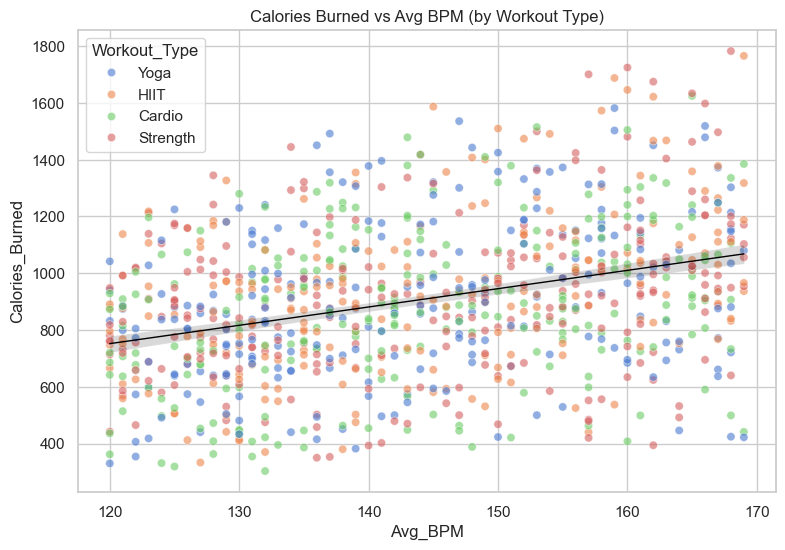

In [15]:
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_clean, x='Avg_BPM', y='Calories_Burned', hue='Workout_Type', alpha=0.6)
sns.regplot(data=df_clean, x='Avg_BPM', y='Calories_Burned', scatter=False, color='black', line_kws={'linewidth':1})
plt.title('Calories Burned vs Avg BPM (by Workout Type)')
plt.show()


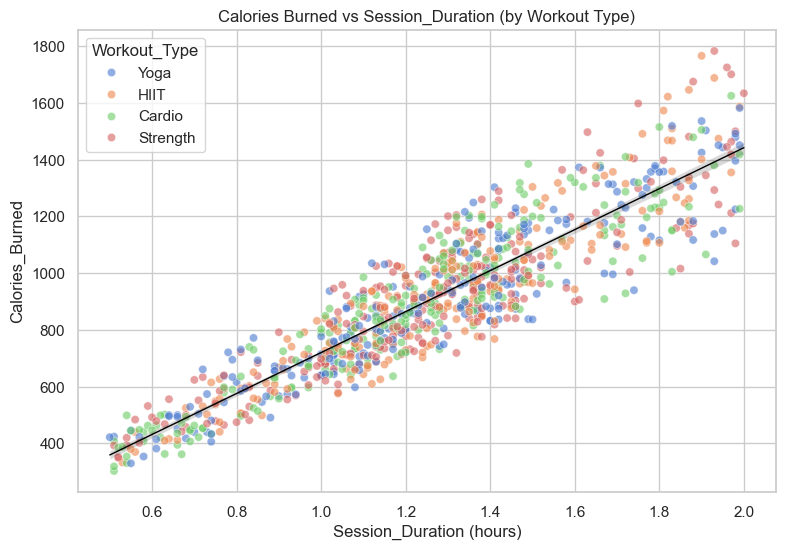

In [16]:
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_clean, x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type', alpha=0.6)
sns.regplot(data=df_clean, x='Session_Duration (hours)', y='Calories_Burned', scatter=False, color='black', line_kws={'linewidth':1})
plt.title('Calories Burned vs Session_Duration (by Workout Type)')
plt.show()

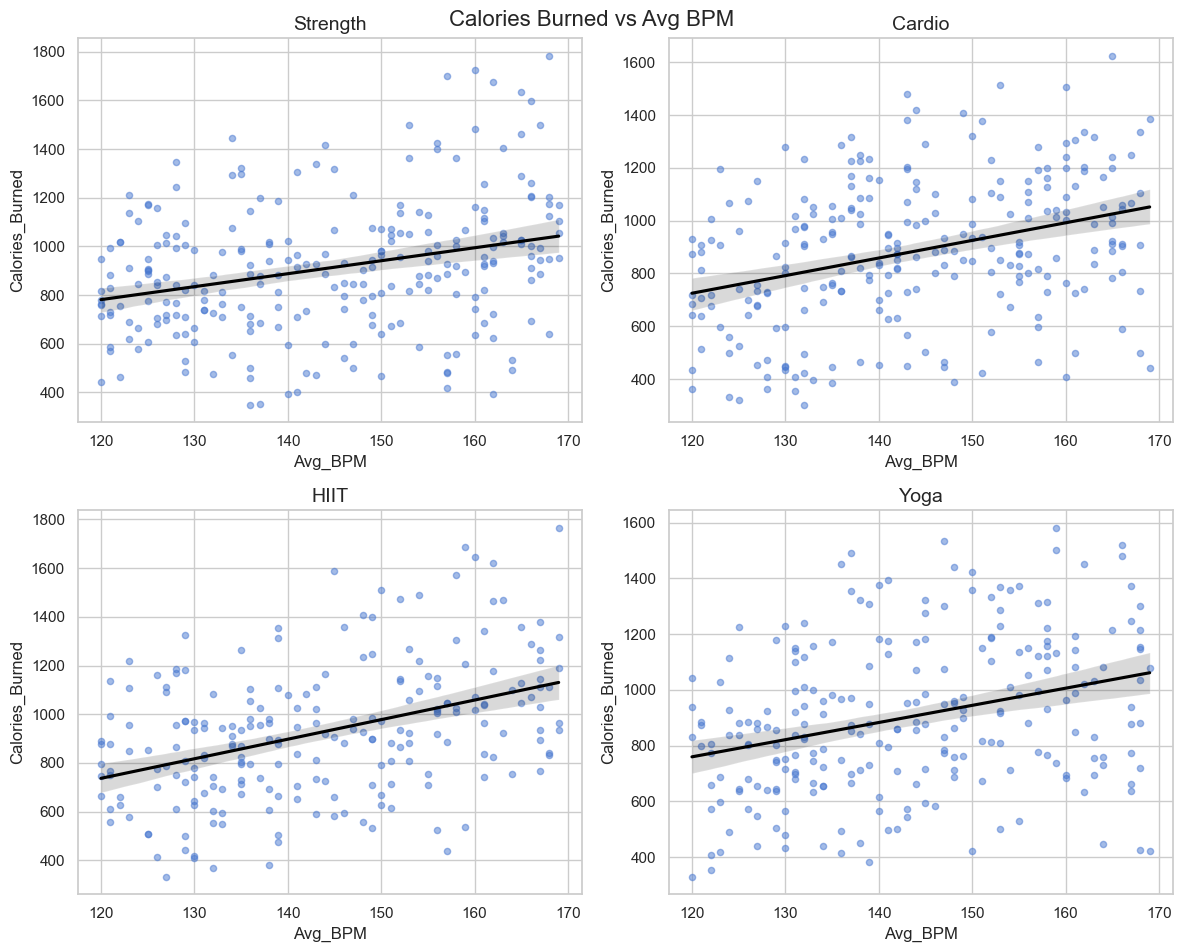

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
workouts = ['Strength', 'Cardio', 'HIIT', 'Yoga']

for i, w in enumerate(workouts, 1):
    plt.subplot(2, 2, i)
    subset = df_clean[df_clean['Workout_Type'] == w]
    sns.regplot(
        data=subset,
        x='Avg_BPM',
        y='Calories_Burned',
        scatter_kws={'alpha': 0.5, 's': 20},
        line_kws={'color': 'black'},
    )
    plt.title(f"{w}", fontsize=14)
    plt.xlabel("Avg_BPM")
    plt.ylabel("Calories_Burned")

plt.suptitle("Calories Burned vs Avg BPM", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()


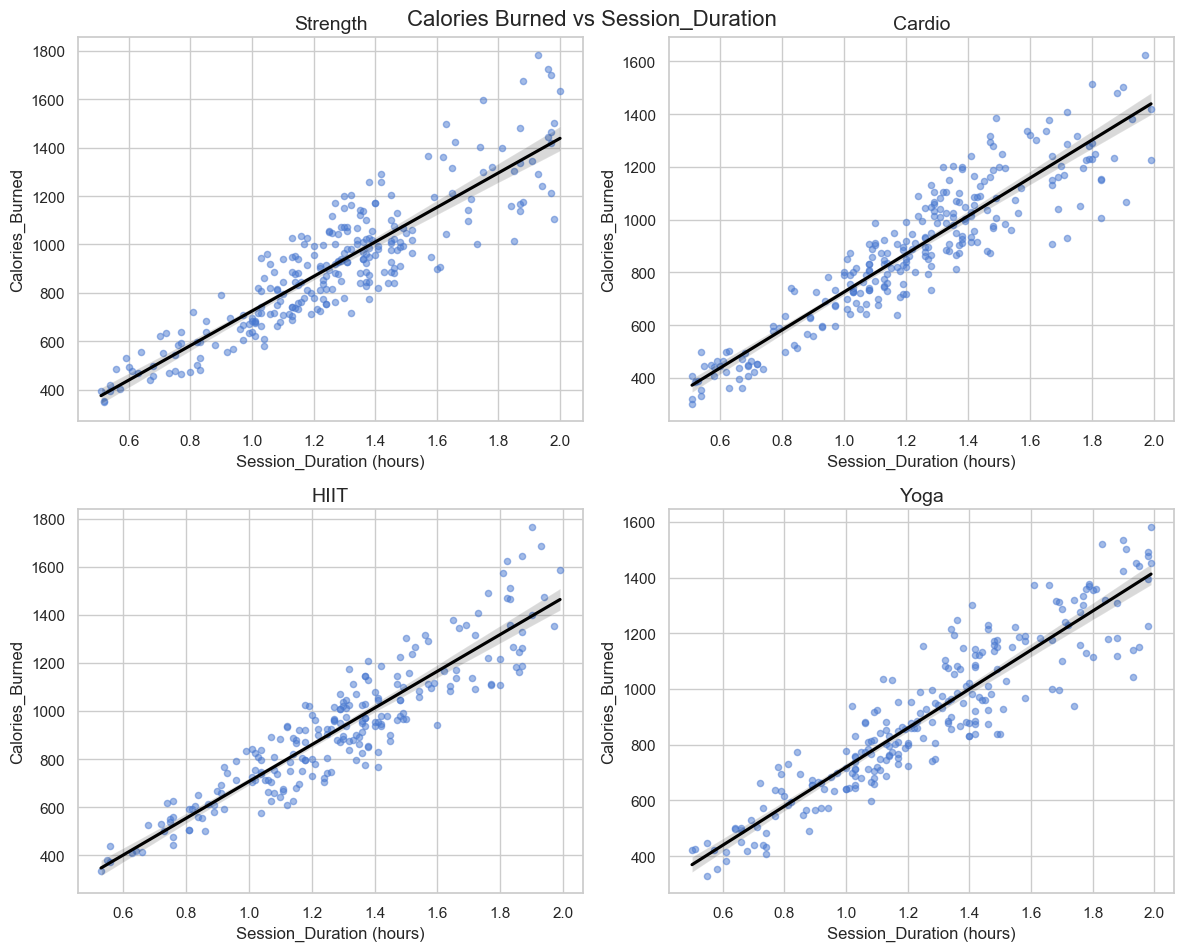

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
workouts = ['Strength', 'Cardio', 'HIIT', 'Yoga']

for i, w in enumerate(workouts, 1):
    plt.subplot(2, 2, i)
    subset = df_clean[df_clean['Workout_Type'] == w]
    sns.regplot(
        data=subset,
        x='Session_Duration (hours)',
        y='Calories_Burned',
        scatter_kws={'alpha': 0.5, 's': 20},
        line_kws={'color': 'black'},
    )
    plt.title(f"{w}", fontsize=14)
    plt.xlabel("Session_Duration (hours)")
    plt.ylabel("Calories_Burned")

plt.suptitle("Calories Burned vs Session_Duration", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

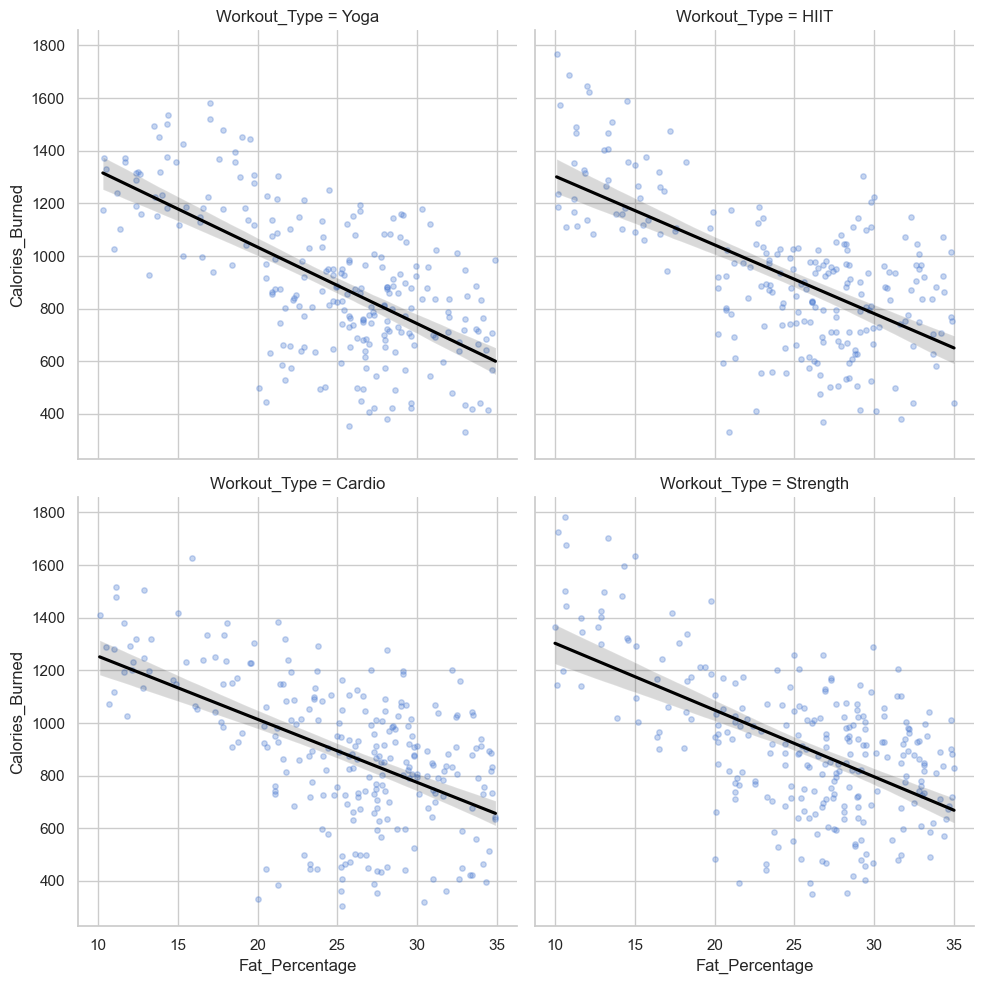

In [19]:
sns.lmplot(
    data=df_clean,
    x="Fat_Percentage",
    y="Calories_Burned",
    col="Workout_Type",
    col_wrap=2,
    line_kws={'color':'black'},
    scatter_kws={'alpha':0.3, 's':15}
)

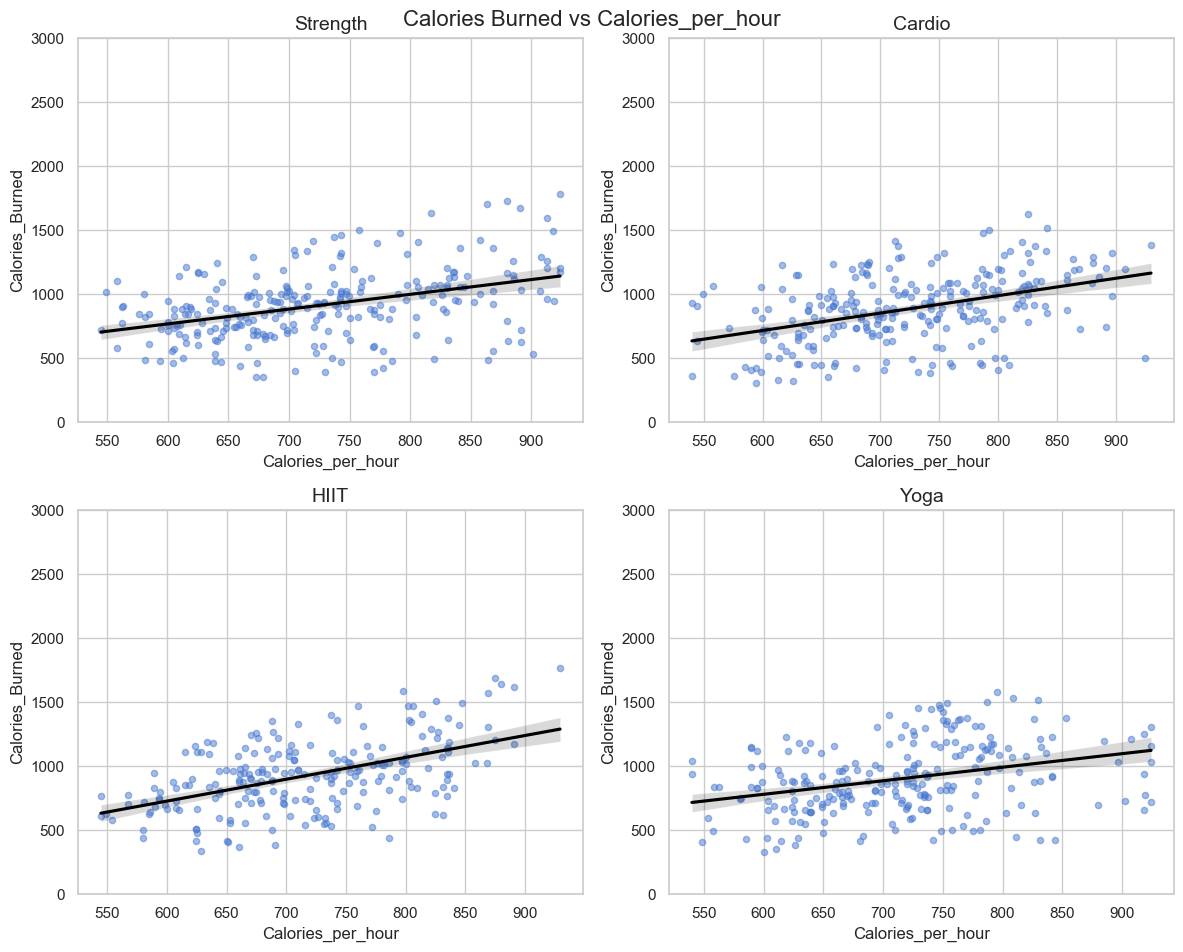

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
workouts = ['Strength', 'Cardio', 'HIIT', 'Yoga']

for i, w in enumerate(workouts, 1):
    plt.subplot(2, 2, i)
    subset = df_clean[df_clean['Workout_Type'] == w]
    sns.regplot(
        data=subset,
        x='Calories_per_hour',
        y='Calories_Burned',
        scatter_kws={'alpha': 0.5, 's': 20},
        line_kws={'color': 'black'},
    )
    plt.title(f"{w}", fontsize=14)
    plt.xlabel('Calories_per_hour')
    plt.ylabel("Calories_Burned")
    # 固定 y 軸刻度範圍
    plt.ylim(0, 3000)

plt.suptitle("Calories Burned vs Calories_per_hour", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

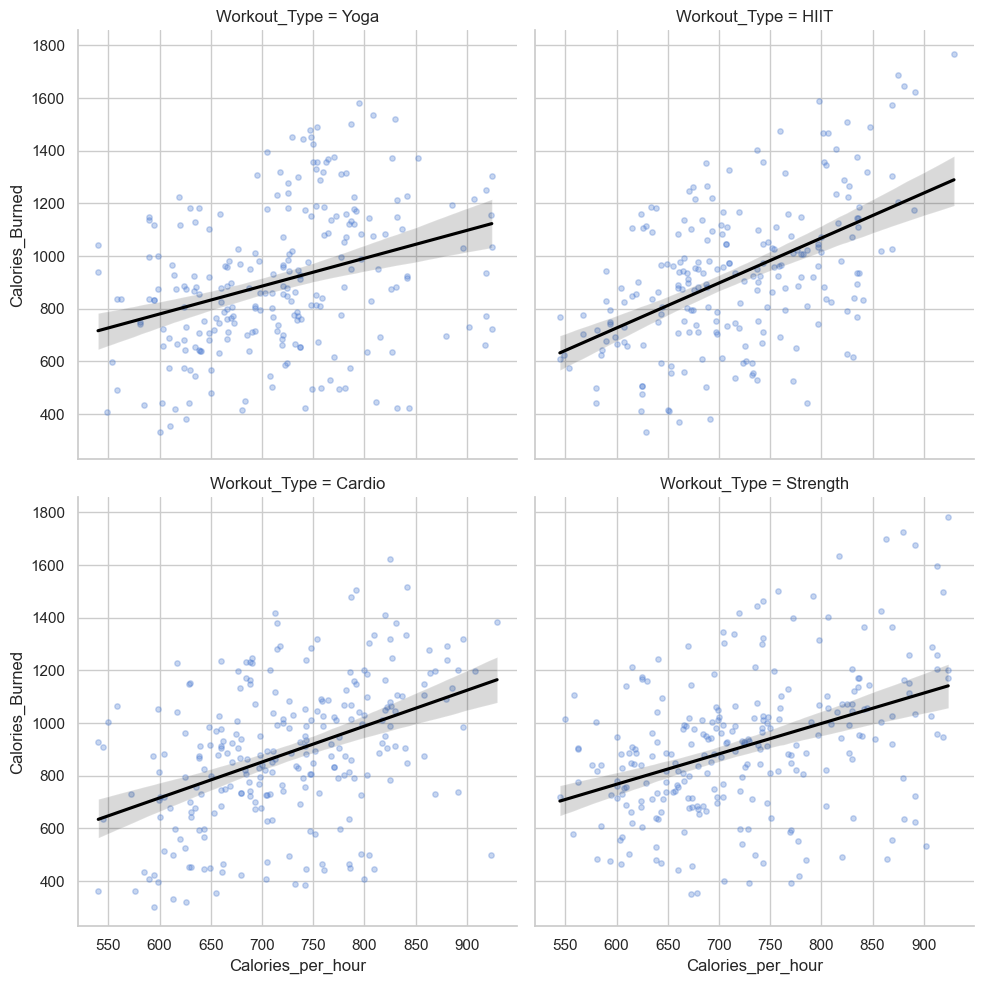

In [21]:
sns.lmplot(
    data=df_clean,
    x="Calories_per_hour",
    y="Calories_Burned",
    col="Workout_Type",
    col_wrap=2,
    line_kws={'color':'black'},
    scatter_kws={'alpha':0.3, 's':15}
)



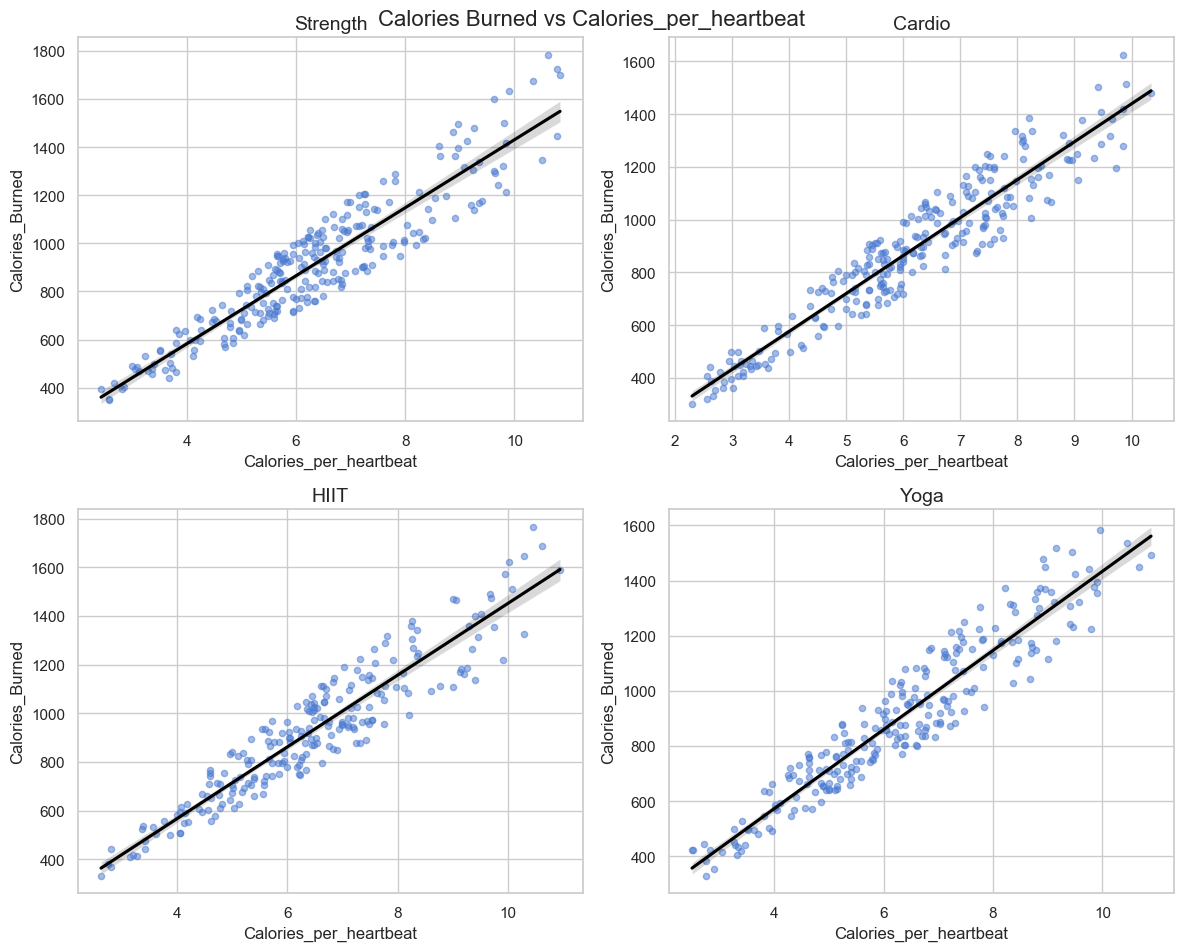

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
workouts = ['Strength', 'Cardio', 'HIIT', 'Yoga']

for i, w in enumerate(workouts, 1):
    plt.subplot(2, 2, i)
    subset = df_clean[df_clean['Workout_Type'] == w]
    sns.regplot(
        data=subset,
        x='Calories_per_heartbeat',
        y='Calories_Burned',
        scatter_kws={'alpha': 0.5, 's': 20},
        line_kws={'color': 'black'},
    )
    plt.title(f"{w}", fontsize=14)
    plt.xlabel('Calories_per_heartbeat')
    plt.ylabel("Calories_Burned")

plt.suptitle("Calories Burned vs Calories_per_heartbeat", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

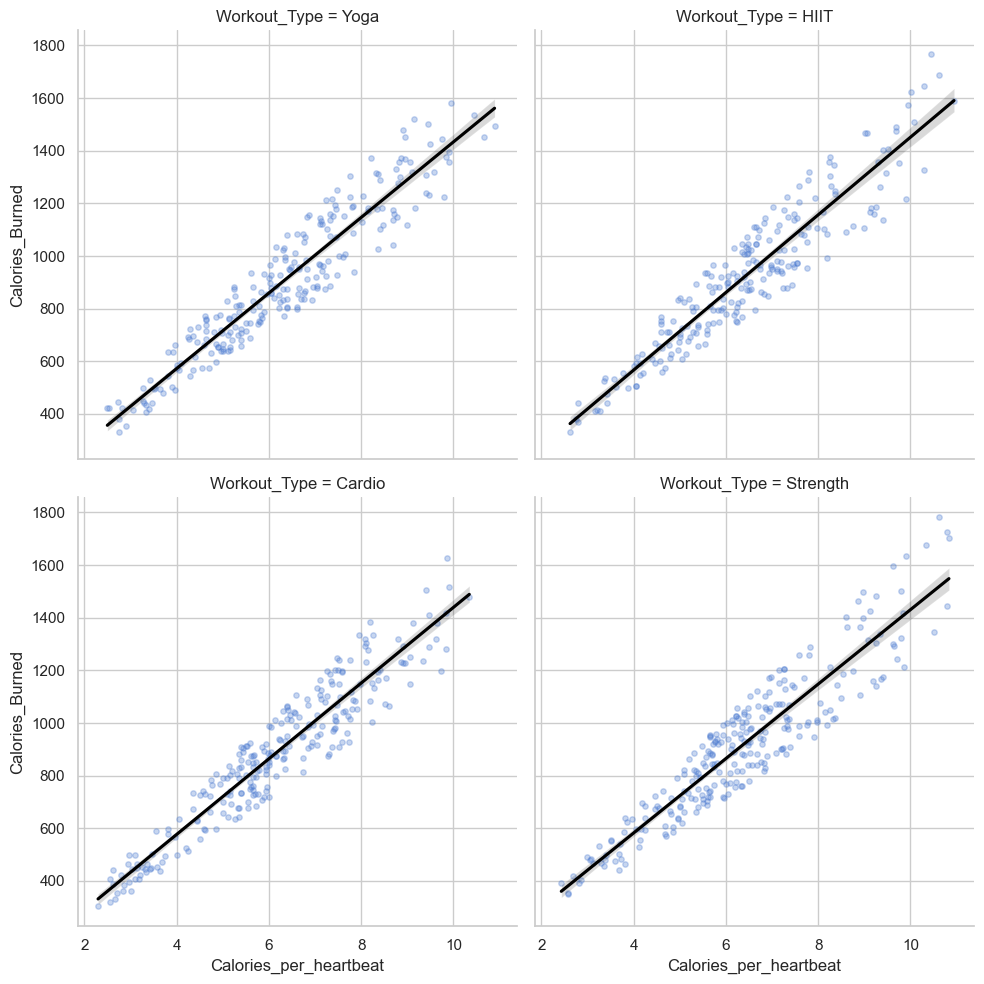

In [23]:
sns.lmplot(
    data=df_clean,
    x="Calories_per_heartbeat",
    y="Calories_Burned",
    col="Workout_Type",
    col_wrap=2,
    line_kws={'color':'black'},
    scatter_kws={'alpha':0.3, 's':15}
)

In [24]:
summary = df_clean.groupby('Workout_Type').agg({
    'Calories_Burned':'mean',
    'Calories_per_hour':'median',
    'Avg_BPM':'mean',
    'Session_Duration (hours)':'mean',
    'Fat_Percentage':'mean',
    'BMI':'mean'
}).round(2)

summary

,Calories_Burned,Calories_per_hour,Avg_BPM,Session_Duration (hours),Fat_Percentage,BMI
Workout_Type,,,,,,
Cardio,884.51,717.78,143.89,1.22,25.40,25.38
HIIT,925.81,707.64,143.52,1.29,24.46,25.20
Strength,910.70,713.74,144.31,1.26,25.46,24.54
Yoga,903.19,720.30,143.27,1.26,24.48,24.55


In [28]:
import pandas as pd
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=[0,25,45,120], labels=['Youth','Adult','Senior'])
df_clean.groupby("Age_Group")["Age"].describe()

/var/folders/5w/kbt5q6f538b2b17zcdhwsbp40000gn/T/ipykernel_28996/3501719651.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby("Age_Group")["Age"].describe()


,count,mean,std,min,25%,50%,75%,max
Age_Group,,,,,,,,
Youth,191.0,21.356021,2.323553,18.0,19.0,21.0,23.0,25.0
Adult,452.0,35.984513,5.867512,26.0,31.0,36.0,41.0,45.0
Senior,330.0,52.409091,3.843351,46.0,49.0,52.0,56.0,59.0


族群差異：Gender × Age_Group（效率差異）

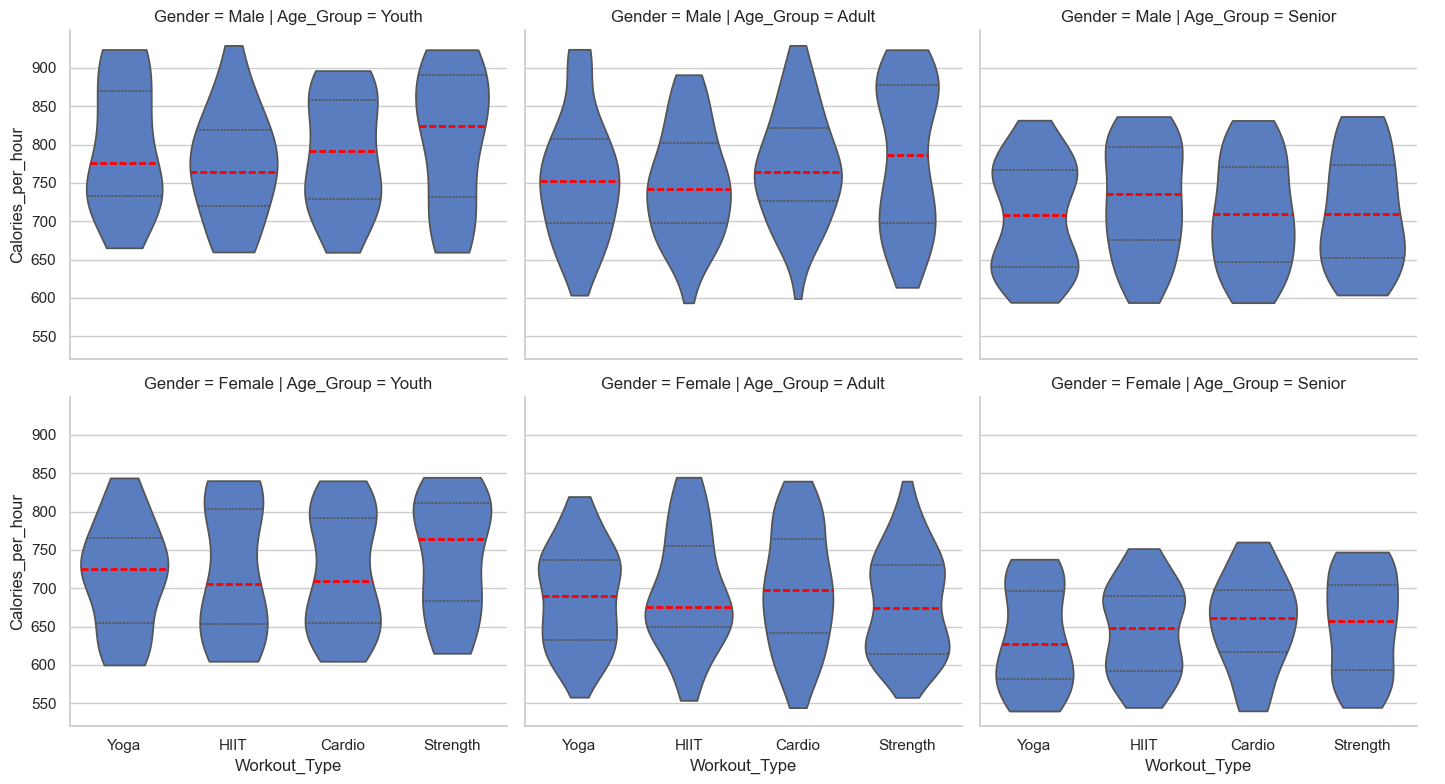

In [29]:
g = sns.catplot( 
        data=df_clean, 
        x="Workout_Type", 
        y="Calories_per_hour", 
        kind="violin", 
        cut=0, 
        inner="quartile", 
        col="Age_Group", 
        row="Gender", 
        height=4, aspect=1.2 )
# 遍歷所有子圖，將中位數線（quartile）改成紅色
for ax in g.axes.flatten():
    lines = ax.lines
    for i in range(1, len(lines), 3):   # 每3條取中間那一條
        lines[i].set_color("red")
        lines[i].set_linewidth(2)
    

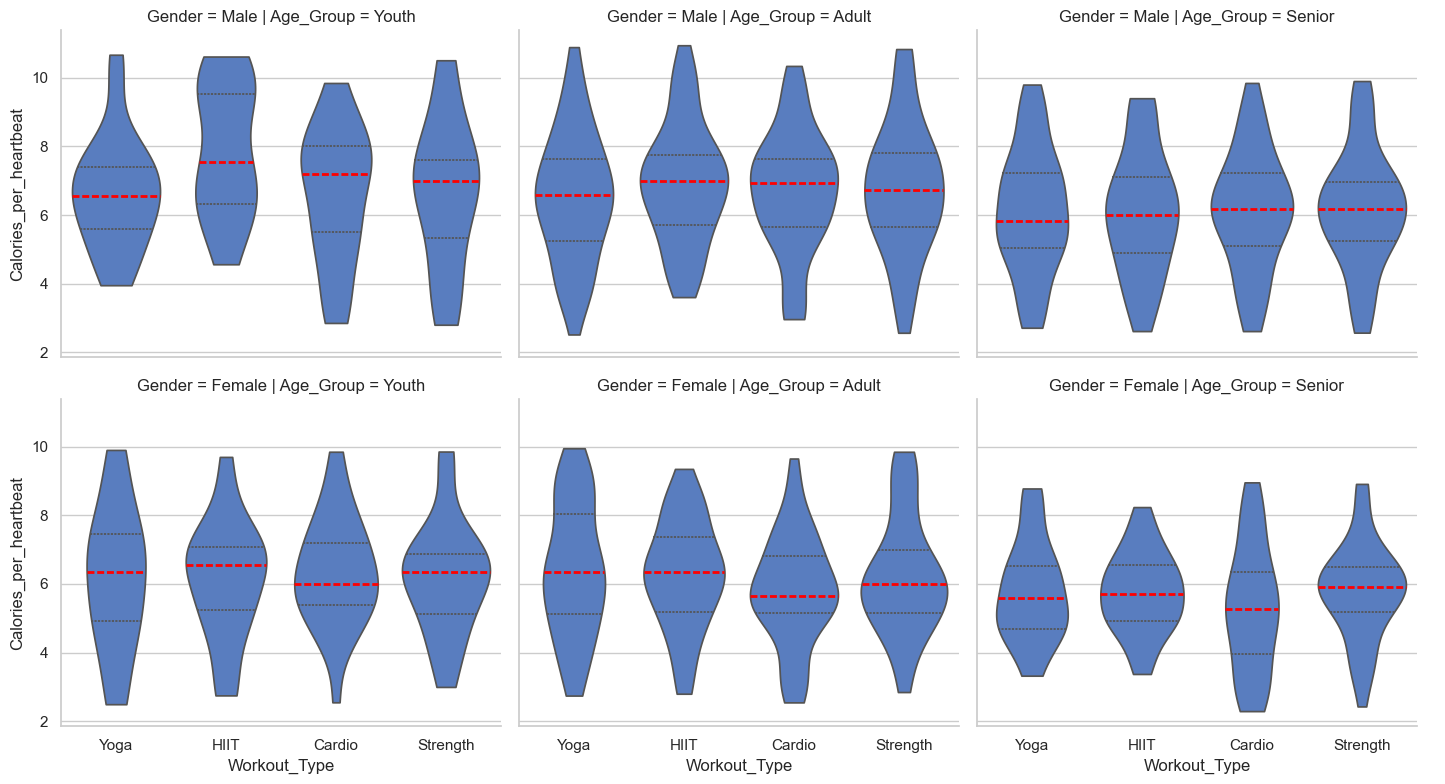

In [30]:
g = sns.catplot( 
        data=df_clean, 
        x="Workout_Type", 
        y="Calories_per_heartbeat", 
        kind="violin", 
        cut=0, 
        inner="quartile", 
        col="Age_Group", 
        row="Gender", 
        height=4, aspect=1.2 )
# 遍歷所有子圖，將中位數線（quartile）改成紅色
for ax in g.axes.flatten():
    lines = ax.lines
    for i in range(1, len(lines), 3):   # 每3條取中間那一條
        lines[i].set_color("red")
        lines[i].set_linewidth(2)